The base concept of dPipe is a modular configuration of your code. To create your own modular environment you have to know the main building blocks. One of these blocks is dataset.


From this tutorial you'll know how to work with datasets in dPipe

# Base Dataset

The base class of dpipe.dataset module is Dataset. This is an abstract method providing an opportunity of creating "everything you want" inside. The main goal of the dataset in dPipe is data extracting. It has only one rule: to extract example of data you should know the identifier of this example. It could look like as redundant but the main idea of creating this base class is the concept of modularity (see scheme).

# Example: MNIST data

Below we create MNIST dataset for classification and demonstrate how it works. For classification, we should know what is the picture and its label. Using this logic we descripe methods load_image and load_label inside the dataset for extracting image and label

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from os.path import join as jp, expanduser
import gzip

import numpy as np

from dpipe.dataset.base import Dataset


def load_mnist(folder, filename, offset):
    with open(expanduser(jp(folder, filename)), 'rb') as f:
        return np.frombuffer(f.read(), np.uint8, offset=offset)


class MNISTClassification(Dataset):
    def __init__(self, folder):
        self.xs = load_mnist(folder, 'train-images-idx3-ubyte', 16).reshape(-1, 1, 28, 28).astype('float32')
        self.ys = load_mnist(folder, 'train-labels-idx1-ubyte', 8).astype('long')
        self.ids = tuple(range(len(self.xs)))
        self.n_chans_image = 1

    def load_image(self, identifier: str):
        return self.xs[int(identifier)]

    def load_label(self, identifier: str):
        return self.ys[int(identifier)]

In [3]:
mnistcl = MNISTClassification('data/MNIST/raw/')

Let's see on 98-th example of the data extracted by MNIST class

In [4]:
mnistcl.load_image(98).shape

(1, 28, 28)

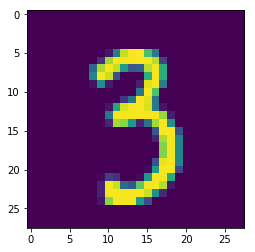

In [6]:
plt.imshow(mnistcl.load_image(98)[0, :, :])

In [7]:
mnistcl.load_label(98)

3

Using this class you can iterate over your data (it helps you in the other modules of dPipe, see [BatchIterator tutorial](https://deep-pipe.readthedocs.io/en/latest/tutorials/batch_iter.html)) 

It could be also the dataset for segmentation. The task of segmentation needs the image and the mask of segments. For extracting this data we create load_image and load_mask method.

In [8]:
class MNISTSegmentation(Dataset):
    def __init__(self, folder):
        self.xs = load_mnist(folder, 'train-images-idx3-ubyte', 16).reshape(-1, 1, 28, 28).astype('float32')
        self.ys = load_mnist(folder, 'train-labels-idx1-ubyte', 8).astype('long')
        self.ids = tuple(range(len(self.xs)))
        self.n_chans_image = 1

    def load_image(self, identifier: str):
        return self.xs[int(identifier)]

    def load_mask(self, identifier: str):
        return self.load_image(identifier) > 0

In [9]:
mnistseg = MNISTSegmentation('data/MNIST/raw/')

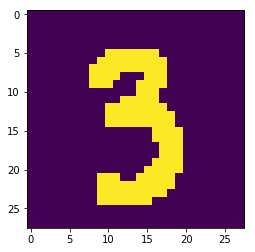

In [10]:
plt.imshow(mnistseg.load_mask(98)[0, :, :])

As mentioned above, the dataset exist only for data loading. If you want to make some manupalations with your data, then you should use Wrappers (tutorial you can find out [here](https://deep-pipe.readthedocs.io/en/latest/tutorials/wrappers.html))